#Zadanie 1a (3 pkt)
Celem zadania jest rozwiązanie problemu plecakowego dwoma metodami - brute force oraz według zadanej heurystyki. Należy zaimplementować metody klasy *KnapSack* - *solve_knapsack_brute_force* oraz *solve_knapsack_pw_ratio*. Poprzez rozwiązanie problemu rozumiemy podanie które przedmioty (indeksy w tablicy) należy spakować do plecaka oraz jaka jest sumaryczna wartość i masa plecaka. Punktacja wygląda następująco:


*   Rozwiązanie problemu metodą brute force. *Podpowiedź: do wygenerowania wszystkich permutacji można użyć funkcji product z biblioteki itertools* - **1.5 pkt**
*   Rozwiązanie problemu według heurystyki - do plecaka pakujemy przedmioty według stosunku wartości do wagi - **1 pkt**
*   Dla metody brute force proszę wygenerować wykres zależności czasu wykonywania metody od liczby elementów w tablicach *weights* i *profits* (do obu tablic należy stopniowo dopisywać po jednym elemencie, np. 10-krotnie, wartości elementów nie mają znaczenia). Proszę również odpowiedzieć na pytania (w osobnej komórce tekstowej) - czy obie metody mają takie same rozwiązania? Jakie są Pani / Pana wnioski? - **0.5 pkt**




In [45]:
import itertools as it
import operator as op
import matplotlib.pyplot as plt
import time

In [46]:
weights = [8, 3, 5, 2]
profits = [16, 8, 9, 6]
capacity = 9

In [47]:
class KnapSack:
  def __init__(self, profits, weights, capacity):
    self.profits = profits
    self.weights = weights
    self.capacity = capacity

  def solve_knapsack_brute_force(self):
    best_cap = 0
    best_price = 0
    best_index = []
    ran = len(self.weights)
    cartesian = [item for item in it.product(range(2), repeat=ran)]

    for i in range(len(cartesian)):
      temp_index = []
      temp_profit = 0
      temp_weight = 0
      for j in range(ran):
        temp_weight += (cartesian[i][j]*self.weights[j])
        temp_profit += (cartesian[i][j]*self.profits[j])
        temp_index.append(0)
      if(temp_weight>self.capacity):
        continue
      if(temp_profit>best_price):
        best_price = temp_profit
        best_cap = temp_weight
        best_index = list(cartesian[i])

    if(len(self.weights) != 0):
      print(f"Best possible profit by using brute force method: {best_price}")
      print(f"Best possible weight by using brute force method: {best_cap}")
      print(f"Items needed to be taken according to brute force method: {best_index}")
    else:
      print("There are no items in knapsack! (brute force)")

  def plot_graph(self):
    times = []
    elements = []
    for i in range(len(self.weights), 10+len(self.weights)):
      weights.append(1)
      profits.append(1)

      start = time.time()
      self.solve_knapsack_brute_force()
      end = time.time()

      elapsed = end - start
      elements.append(i+1)
      times.append(elapsed)
    
    plt.plot(elements, times)
    plt.xlabel('Number of elements in profits and weights')
    plt.ylabel('Time in seconds')
    plt.show()

  def solve_knapsack_pw_ratio(self):
    ratio = []
    data = []
    heu_index = []
    heu_profit = 0
    heu_weight = 0
    ran = len(self.weights)

    if(len(self.weights) != 0):
      for i in range (ran):
        ratio.append(self.profits[i]/self.weights[i])
        data.append(0)
        data[i] = (self.profits[i], self.weights[i], ratio[i], i)
        heu_index.append(0)
      data.sort(reverse=True, key=op.itemgetter(2))

      i=0
      while(heu_profit <= capacity):
        heu_profit += data[i][0]
        heu_weight += data[i][1]
        heu_index[data[i][3]] = 1
        i+=1
      print(f"Best possible profit by using heuristic method: {heu_profit}")
      print(f"Best possible weight by usingheuristic method: {heu_weight}")
      print(f"Items needed to be taken according to heuristic method: {heu_index}")
    else:
      print("There are no items in knapsack! (heuristic)")

Best possible profit by using brute force method: 17
Best possible weight by using brute force method: 8
Items needed to be taken according to brute force method: [0, 1, 1, 0]

Best possible profit by using heuristic method: 14
Best possible weight by usingheuristic method: 5
Items needed to be taken according to heuristic method: [0, 1, 0, 1]

Best possible profit by using brute force method: 18
Best possible weight by using brute force method: 9
Items needed to be taken according to brute force method: [0, 1, 1, 0, 1]
Best possible profit by using brute force method: 18
Best possible weight by using brute force method: 9
Items needed to be taken according to brute force method: [0, 1, 1, 0, 0, 1]
Best possible profit by using brute force method: 18
Best possible weight by using brute force method: 9
Items needed to be taken according to brute force method: [0, 1, 1, 0, 0, 0, 1]
Best possible profit by using brute force method: 18
Best possible weight by using brute force method: 9
It

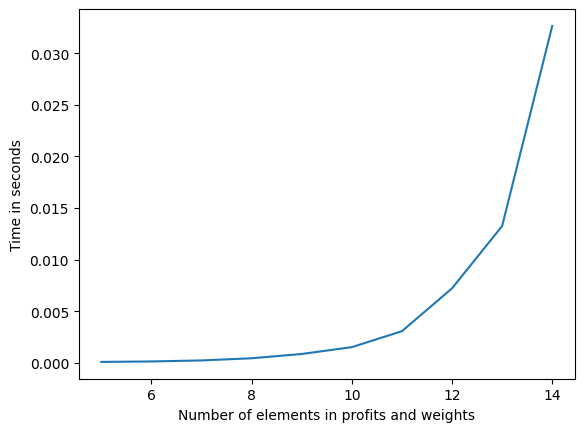

In [48]:
knapsack = KnapSack(profits, weights, capacity)
knapsack.solve_knapsack_brute_force()
print()
knapsack.solve_knapsack_pw_ratio()
print()
knapsack.plot_graph()

Metoda brute force i metoda heurystyczna zwykle zwracają różne wyniki. Ta pierwsza zawsze zwróci najlepszy sposób zapełnienia plecaka, ceną co raz dłużyszch obliczeń, które się wykładniczo wydłużają wraz z ilością przedmiotów. Metoda heurystyczna zwraca tylko przybliżony wynik. Nie jest on najlepszy, ale jest on otrzymany o wiele szybciej niż z pomocą metody brute force, szczególnie z większą ilością przedmiotów.